In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import random
import os

from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [2]:
class CFG:
    SEED = 42

In [3]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(CFG.SEED)  # seed 고정

In [4]:
train = pd.read_csv('open/train.csv')
test = pd.read_csv('open/test.csv')

# 필요 없는 컬럼 삭제 및 데이터 분리

def get_x_y(df):
    if 'class' in df.columns:
        df_x = df.drop(columns=['id', 'class','father','mother','gender'])
        df_y = df['class']
        return df_x, df_y
    else:
        df_x = df.drop(columns=['id','father','mother','gender'])
        return df_x

train_x, train_y = get_x_y(train)
test_x = get_x_y(test)
train_x

,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15
0,2,G G,A G,A A,G A,C A,A A,A A,G G,A A,G G,A G,A A,A A,A A,A A
1,2,A G,A G,C A,A A,A A,A G,A A,G A,A A,A G,A A,G A,G G,A A,A A
2,2,G G,G G,A A,G A,C C,G G,A A,G A,G A,A G,A A,A A,A A,A A,A A
3,1,A A,G G,A A,G A,A A,G G,G G,A A,G G,A G,G G,G G,G G,A A,G G
4,2,G G,G G,C C,A A,C C,A A,A A,A A,A A,G G,A A,A A,A G,A A,G A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,2,A G,A G,A A,G A,C C,A G,A A,G A,A A,G G,A G,G A,A A,A A,A A
258,2,G G,A A,C A,A A,A A,A G,G A,G A,A A,A G,A G,A A,A G,A A,G A
259,1,A G,G G,A A,G A,A A,A G,G G,G A,G A,A A,G G,G G,G G,C A,G G
260,1,A A,G G,A A,G A,A A,G G,G G,A A,G A,A G,A G,G A,G G,C A,G G


In [5]:
# 분석을 위해 snp_ 데이터를 labelencoder() 이용하여 문자-> 숫자로 변경. 

class_le = preprocessing.LabelEncoder()  
snp_le = preprocessing.LabelEncoder()
snp_col = [f'SNP_{str(x).zfill(2)}' for x in range(1,16)]

snp_data = []
for col in snp_col:
    snp_data += list(train_x[col].values)

train_y = class_le.fit_transform(train_y)
snp_le.fit(snp_data)

LabelEncoder()

In [6]:
for col in train_x.columns:
    if col in snp_col:
        train_x[col] = snp_le.transform(train_x[col])
        test_x[col] = snp_le.transform(test_x[col])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.2)

In [8]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(209, 16) (53, 16) (209,) (53,)


In [9]:
# 신경망 생성. Dense 3개. 활성화 함수는 입력층은 ReLU,나머지는 softmax 사용. 
# 컬럼의 수가 16개 (trait, SNP_01~15) 이므로 input_shape은 (16,)이 된다. 
# 출력층 값은 ABC 3개중에 하나가 나와야 하므로 unit=3로 지정. 

model = keras.Sequential()
model.add(keras.layers.Dense(units=100, activation='ReLU', input_shape=(16,)))
model.add(keras.layers.Dense(units=100, activation='softmax'))


model.add(keras.layers.Dense(units=3, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1700      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 3)                 303       
                                                                 
Total params: 12,103
Trainable params: 12,103
Non-trainable params: 0
_________________________________________________________________


In [11]:
# compile 작업. 최적화 알고리즘 adam사용. 다중분류 손실함수. 정확도 사용. 

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [12]:
history = model.fit(X_train, y_train, epochs=600)

Epoch 1/600
7/7 [==============================] - 0s 2ms/step - loss: 1.0830 - accuracy: 0.6172
Epoch 2/600
7/7 [==============================] - 0s 1ms/step - loss: 1.0551 - accuracy: 0.6794
Epoch 3/600
7/7 [==============================] - 0s 2ms/step - loss: 1.0270 - accuracy: 0.6938
Epoch 4/600
7/7 [==============================] - 0s 2ms/step - loss: 1.0001 - accuracy: 0.6938
Epoch 5/600
7/7 [==============================] - 0s 2ms/step - loss: 0.9737 - accuracy: 0.6938
Epoch 6/600
7/7 [==============================] - 0s 2ms/step - loss: 0.9498 - accuracy: 0.6938
Epoch 7/600
7/7 [==============================] - 0s 1ms/step - loss: 0.9244 - accuracy: 0.7177
Epoch 8/600
7/7 [==============================] - 0s 2ms/step - loss: 0.9024 - accuracy: 0.7799
Epoch 9/600
7/7 [==============================] - 0s 2ms/step - loss: 0.8830 - accuracy: 0.8660
Epoch 10/600
7/7 [==============================] - 0s 2ms/step - loss: 0.8638 - accuracy: 0.8995
Epoch 11/600
7/7 [===========

7/7 [==============================] - 0s 0s/step - loss: 0.1798 - accuracy: 1.0000
Epoch 168/600
7/7 [==============================] - 0s 1ms/step - loss: 0.1783 - accuracy: 1.0000
Epoch 169/600
7/7 [==============================] - 0s 2ms/step - loss: 0.1768 - accuracy: 1.0000
Epoch 170/600
7/7 [==============================] - 0s 2ms/step - loss: 0.1754 - accuracy: 1.0000
Epoch 171/600
7/7 [==============================] - 0s 0s/step - loss: 0.1740 - accuracy: 1.0000
Epoch 172/600
7/7 [==============================] - 0s 1ms/step - loss: 0.1727 - accuracy: 1.0000
Epoch 173/600
7/7 [==============================] - 0s 2ms/step - loss: 0.1714 - accuracy: 1.0000
Epoch 174/600
7/7 [==============================] - 0s 1ms/step - loss: 0.1700 - accuracy: 1.0000
Epoch 175/600
7/7 [==============================] - 0s 2ms/step - loss: 0.1688 - accuracy: 1.0000
Epoch 176/600
7/7 [==============================] - 0s 1ms/step - loss: 0.1674 - accuracy: 1.0000
Epoch 177/600
7/7 [=======

7/7 [==============================] - 0s 1ms/step - loss: 0.0638 - accuracy: 1.0000
Epoch 333/600
7/7 [==============================] - 0s 918us/step - loss: 0.0634 - accuracy: 1.0000
Epoch 334/600
7/7 [==============================] - 0s 0s/step - loss: 0.0631 - accuracy: 1.0000
Epoch 335/600
7/7 [==============================] - 0s 404us/step - loss: 0.0628 - accuracy: 1.0000
Epoch 336/600
7/7 [==============================] - 0s 3ms/step - loss: 0.0624 - accuracy: 1.0000
Epoch 337/600
7/7 [==============================] - 0s 3ms/step - loss: 0.0621 - accuracy: 1.0000
Epoch 338/600
7/7 [==============================] - 0s 2ms/step - loss: 0.0618 - accuracy: 1.0000
Epoch 339/600
7/7 [==============================] - 0s 2ms/step - loss: 0.0615 - accuracy: 1.0000
Epoch 340/600
7/7 [==============================] - 0s 0s/step - loss: 0.0612 - accuracy: 1.0000
Epoch 341/600
7/7 [==============================] - 0s 468us/step - loss: 0.0608 - accuracy: 1.0000
Epoch 342/600
7/7 [=

Epoch 497/600
7/7 [==============================] - 0s 1ms/step - loss: 0.0294 - accuracy: 1.0000
Epoch 498/600
7/7 [==============================] - 0s 1ms/step - loss: 0.0293 - accuracy: 1.0000
Epoch 499/600
7/7 [==============================] - 0s 2ms/step - loss: 0.0292 - accuracy: 1.0000
Epoch 500/600
7/7 [==============================] - 0s 1ms/step - loss: 0.0290 - accuracy: 1.0000
Epoch 501/600
7/7 [==============================] - 0s 1ms/step - loss: 0.0289 - accuracy: 1.0000
Epoch 502/600
7/7 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 1.0000
Epoch 503/600
7/7 [==============================] - 0s 2ms/step - loss: 0.0287 - accuracy: 1.0000
Epoch 504/600
7/7 [==============================] - 0s 1ms/step - loss: 0.0285 - accuracy: 1.0000
Epoch 505/600
7/7 [==============================] - 0s 1ms/step - loss: 0.0284 - accuracy: 1.0000
Epoch 506/600
7/7 [==============================] - 0s 2ms/step - loss: 0.0283 - accuracy: 1.0000
Epoch 507/

In [13]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.2173 - accuracy: 0.9245


[0.2173050194978714, 0.9245283007621765]

In [14]:
preds = model.predict(test_x)

6/6 [==============================] - 0s 1ms/step


In [15]:
print(preds)

[[0.97616553 0.01413555 0.00969892]
 [0.00855013 0.98379534 0.00765441]
 [0.00824589 0.01049293 0.9812612 ]
 [0.00843519 0.01096427 0.98060054]
 [0.97616875 0.01413424 0.00969701]
 [0.00854884 0.9837992  0.00765197]
 [0.00831702 0.01054142 0.98114157]
 [0.00860047 0.98364955 0.00774991]
 [0.97616875 0.01413424 0.00969701]
 [0.97616875 0.01413424 0.00969701]
 [0.00824582 0.01049288 0.9812613 ]
 [0.00854883 0.9837992  0.00765195]
 [0.03234316 0.8176453  0.15001144]
 [0.97616875 0.01413424 0.00969701]
 [0.00860016 0.9836505  0.00774932]
 [0.00854898 0.98379874 0.00765224]
 [0.97616875 0.01413424 0.00969701]
 [0.00854905 0.9837985  0.00765237]
 [0.00854892 0.98379886 0.00765214]
 [0.00842515 0.01094199 0.9806329 ]
 [0.00854883 0.9837992  0.00765195]
 [0.00854891 0.983799   0.00765211]
 [0.00855528 0.98378044 0.00766415]
 [0.97616875 0.01413426 0.00969703]
 [0.00854937 0.98379767 0.00765297]
 [0.01707173 0.9493734  0.03355482]
 [0.00855083 0.9837935  0.00765574]
 [0.9761685  0.01413428 0.00

In [16]:
# 랜덤포레스트 분류 사용. 

clf = RandomForestClassifier(random_state=CFG.SEED)
clf.fit(train_x, train_y)

RandomForestClassifier(random_state=42)

In [17]:
# 예측 및 테스트 값 출력

preds = clf.predict(test_x)
print('Done.')
print(preds)
preds.shape
preds.ndim

Done.
[0 1 2 1 0 1 2 1 0 0 2 1 2 0 1 1 0 1 1 2 1 1 1 0 1 1 1 0 0 1 0 0 1 2 0 1 2
 1 1 2 0 1 2 1 1 1 1 2 1 2 0 1 0 1 1 1 2 0 1 2 0 1 2 2 2 0 1 0 0 1 1 1 0 0
 2 1 2 1 1 1 2 1 0 1 1 1 1 1 2 0 1 1 2 1 1 2 0 1 0 2 0 1 1 2 0 0 2 1 0 1 2
 1 1 1 1 0 0 2 1 1 0 1 1 2 2 1 2 1 0 1 0 0 1 1 1 2 0 0 1 0 0 0 2 1 1 1 0 1
 2 0 0 1 0 1 1 0 0 1 2 0 1 2 2 1 0 0 2 1 1 0 1 2 2 1 1]


1

In [18]:


preds

array([0, 1, 2, 1, 0, 1, 2, 1, 0, 0, 2, 1, 2, 0, 1, 1, 0, 1, 1, 2, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 2, 0, 1, 2, 1,
       1, 1, 1, 2, 1, 2, 0, 1, 0, 1, 1, 1, 2, 0, 1, 2, 0, 1, 2, 2, 2, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 2, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1,
       2, 0, 1, 1, 2, 1, 1, 2, 0, 1, 0, 2, 0, 1, 1, 2, 0, 0, 2, 1, 0, 1,
       2, 1, 1, 1, 1, 0, 0, 2, 1, 1, 0, 1, 1, 2, 2, 1, 2, 1, 0, 1, 0, 0,
       1, 1, 1, 2, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 2, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 2, 0, 1, 2, 2, 1, 0, 0, 2, 1, 1, 0, 1, 2, 2, 1, 1])

In [19]:
# 저장

submit = pd.read_csv('sample_submission.csv')

submit['class'] = class_le.inverse_transform(preds)

submit.to_csv('open/answer/submitRandomReLU.csv', index=False)

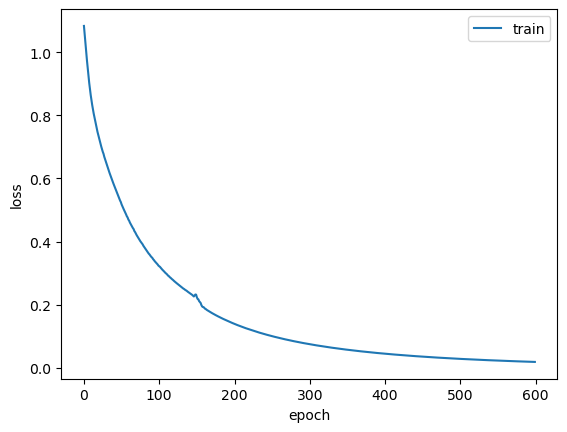

In [20]:
# loss값 시각화. SGD에 비해서 최종 loss값이 낮다. 

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train'])
plt.show()